In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# Generate synthetic time series data
np.random.seed(0)
n = 100  # Number of data points
ar_params = [0.75, -0.25]  # AR parameters
ma_params = [0.65, 0.35]   # MA parameters
k = 1  # Constant term
sigma = 0.5  # Standard deviation of the noise

In [3]:
# Generate ARMA process
ar = np.r_[1, -np.array(ar_params)]
ma = np.r_[1, np.array(ma_params)]
y = k + np.random.normal(scale=sigma, size=n)
y = np.convolve(y, ma, mode='same')
y = np.convolve(y, ar, mode='same')

In [15]:
ma

array([1.  , 0.65, 0.35])

In [12]:
# Create a DataFrame for the time series
df = pd.DataFrame({'y': y})
df.head()

,y
0,1.110583
1,1.918316
2,1.933958
3,0.512603
4,1.559733


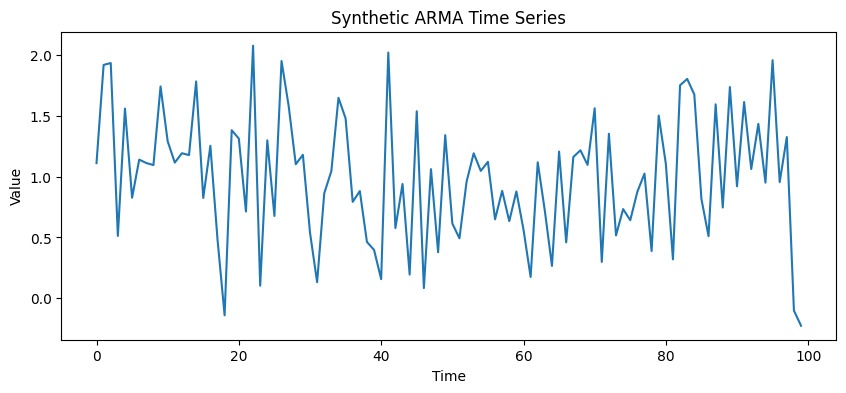

In [6]:
# Plot the time series
plt.figure(figsize=(10, 4))
plt.plot(df['y'])
plt.title('Synthetic ARMA Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


In [7]:
# Fit an ARMA model to the data
model = ARIMA(df['y'], order=(2, 0, 2))  # ARMA(p=2, d=0, q=2)
model_fit = model.fit()


C:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [8]:
# Print model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 -73.653
Date:                Wed, 12 Jun 2024   AIC                            159.305
Time:                        15:24:08   BIC                            174.936
Sample:                             0   HQIC                           165.631
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9888      0.053     18.614      0.000       0.885       1.093
ar.L1         -1.2246      0.069    -17.710      0.000      -1.360      -1.089
ar.L2         -0.8236      0.086     -9.589      0.0

In [9]:
# Make predictions
pred_start = len(df)
pred_end = len(df) + 10
predictions = model_fit.predict(start=pred_start, end=pred_end, dynamic=False)

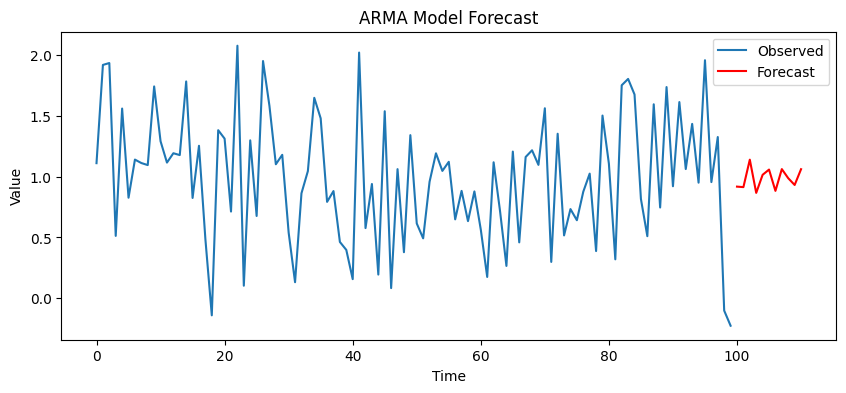

In [10]:
# Plot predictions
plt.figure(figsize=(10, 4))
plt.plot(df['y'], label='Observed')
plt.plot(range(pred_start, pred_end + 1), predictions, label='Forecast', color='red')
plt.title('ARMA Model Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [17]:
# Generate synthetic time series data
np.random.seed(0)
n = 100  # Number of data points
ar_params = [0.75, -0.25]  # AR parameters
ma_params = [0.65, 0.35]   # MA parameters
k = 1  # Constant term
sigma = 0.5  # Standard deviation of the noise

# Generate ARMA process
ar = np.r_[1, -np.array(ar_params)]
ma = np.r_[1, np.array(ma_params)]
y = k + np.random.normal(scale=sigma, size=n)
y = np.convolve(y, ma, mode='same')
y = np.convolve(y, ar, mode='same')

# Create a DataFrame for the time series
df = pd.DataFrame({'y': y})

# Explicitly implement the ARMA model for prediction
def arma_predict(y, ar_params, ma_params, k, steps):
    p = len(ar_params)
    q = len(ma_params)
    y_pred = np.zeros(steps)
    errors = np.zeros(steps)
    
    for t in range(steps):
        ar_term = sum(ar_params[i] * y[-(i+1)] for i in range(p))
        ma_term = sum(ma_params[i] * errors[-(i+1)] for i in range(q))
        errors[t] = np.random.normal(scale=sigma)
        y_pred[t] = k + ar_term + ma_term + errors[t]
    
    return y_pred

In [18]:
model = ARIMA(df['y'], order=(2, 0, 2))  # ARMA(p=2, d=0, q=2)
model_fit = model.fit()

C:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [19]:
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 -73.653
Date:                Wed, 12 Jun 2024   AIC                            159.305
Time:                        15:39:49   BIC                            174.936
Sample:                             0   HQIC                           165.631
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9888      0.053     18.614      0.000       0.885       1.093
ar.L1         -1.2246      0.069    -17.710      0.000      -1.360      -1.089
ar.L2         -0.8236      0.086     -9.589      0.0

In [20]:
steps = 10
manual_predictions = arma_predict(df['y'].values, ar_params, ma_params, k, steps)

In [21]:
# Make predictions using the fitted model
statsmodels_predictions = model_fit.predict(start=len(df), end=len(df) + steps - 1, dynamic=False)


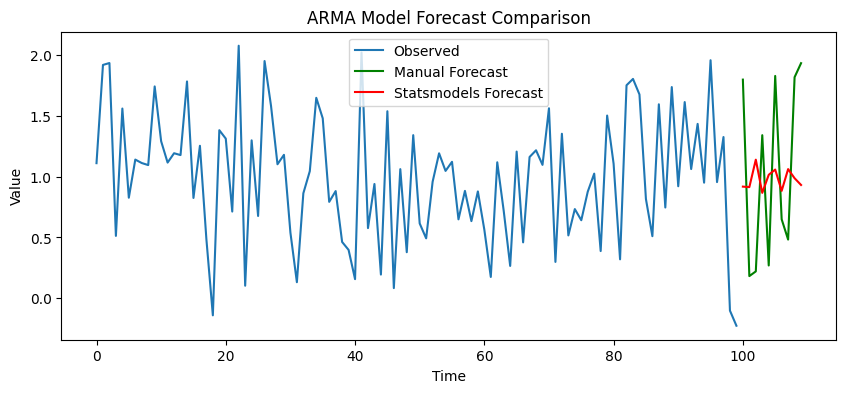

In [22]:
# Plot predictions
plt.figure(figsize=(10, 4))
plt.plot(df['y'], label='Observed')
plt.plot(range(len(df), len(df) + steps), manual_predictions, label='Manual Forecast', color='green')
plt.plot(range(len(df), len(df) + steps), statsmodels_predictions, label='Statsmodels Forecast', color='red')
plt.title('ARMA Model Forecast Comparison')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

## Method 2

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [24]:
# Generate some sample data (e.g., a simple sine wave with noise)
np.random.seed(42)
n = 100
time = np.arange(n)
data = np.sin(0.1 * time) + np.random.normal(0, 0.1, n)

In [32]:
# Convert to a pandas DataFrame
df = pd.DataFrame({'value': data})

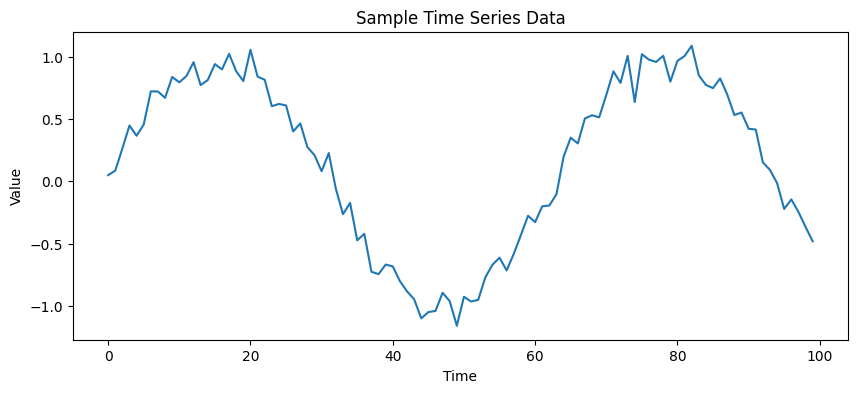

In [27]:
# Plot the time series data
plt.figure(figsize=(10, 4))
plt.plot(df['value'])
plt.title('Sample Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [28]:
# Fit an ARIMA model (order=(p, d, q))
model = ARIMA(df['value'], order=(2, 1, 2))
model_fit = model.fit()

C:\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [37]:
# Print the summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  100
Model:                 ARIMA(2, 1, 2)   Log Likelihood                  68.582
Date:                Wed, 12 Jun 2024   AIC                           -127.164
Time:                        16:41:24   BIC                           -114.188
Sample:                             0   HQIC                          -121.914
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1863      0.140      8.467      0.000       0.912       1.461
ar.L2         -0.2194      0.142     -1.547      0.122      -0.497       0.059
ma.L1         -1.6410      0.091    -18.081      0.0

In [30]:
# Make predictions
pred_start = len(df)
pred_end = len(df) + 10
predictions = model_fit.predict(start=pred_start, end=pred_end, dynamic=False)


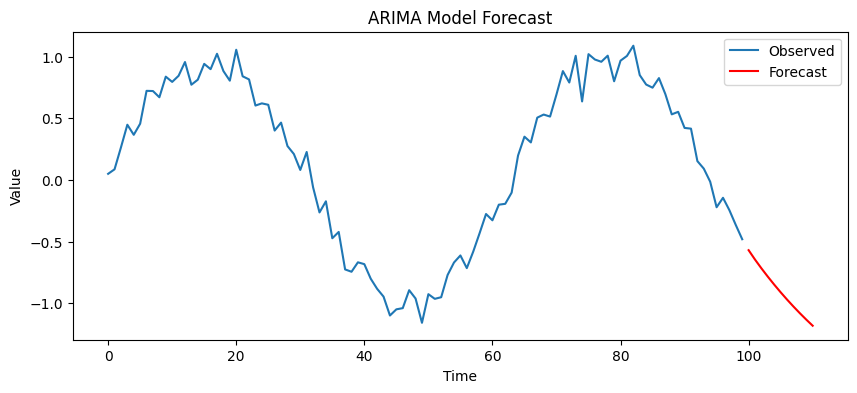

In [34]:
# Plot the observed data and the predictions
plt.figure(figsize=(10, 4))
plt.plot(df['value'], label='Observed')
plt.plot(range(pred_start, pred_end + 1), predictions, label='Forecast', color='red')
plt.title('ARIMA Model Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()